# Исследование интернет-магазина компьютерных игр «Стримчик»

В нашем распоряжении исторические данные о продажах интернет-магазина "Стримчик", который продает по всему миру компьютерные игры.

**Цель исследования:**
1. Проанализировать исходные данные
2. Проверить некоторые гипотезы, которые могут помочь бизнесу принять правильные решения
3. Выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

**Ход исследования**

Данные для исследования будут получены из одного файла. О качестве данных ничего не известно, поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

Данные включают в себя:
* Продажи игр
* Оценки пользователей и экспертов
* Жанры
* Платформы (например, Xbox или PlayStation)

Необходимо будет проверить данные на ошибки и оценить их влияние на исследование. На этапе предобработки нужно осуществить поиск возможностей исправления всех ошибок данных, которые не приведут к искажению конечного результата. При необходимости, осуществим создание новых столбцов, и приступим к проведению исследовательского анализа.

**Этапы исследования:**

1. Загрузка и обзор данных
2. Предобработка данных
3. Исследовательский анализ
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Написание общего вывода

### Загрузка данных

Импортируем необходимые для исследования библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

Откроем файл с датасетом:

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv', sep=',')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')

Выведем первые строки и общую информацию о датасете:

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете имеются пропуски данных в шести столбцах и несоответствия типов данных, которые будем обрабатывать в разделе предобработки данных.

### Предобработка данных

Для проведения дальнейшего исследования осуществим предобработку и подготовку исходных данных.

Заменим названия столбцов - приведем их к нижнему регистру:

In [5]:
data = data.rename(columns={
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
})

Для проверки изменений выведем названия столбцов:

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посчитаем количество пропусков в каждом столбце датафрейма:

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В 6 столбцах обнаружены пропущенные данные. Пропуски в данных появляются разными путями. Например, пользователь не указал какие-нибудь сведения или автоматизированная система сбора информации дала сбой. Иногда пропуски оставляют умышленно, рассчитывая на автозаполнение спецсимволами. Таким образом, основными причинами пропусков являются человеческий фактор и техническая ошибка.

Выведем строки датафрейма, где имеются пропуски в столбце `name`:

In [8]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Имеем две компьютерные игры без названий, рейтинга, оценок и минимальными продажами - их можно удалить из таблицы в виду их малого количества и невозможности восстановления исходных данных:

In [9]:
data = data.dropna(subset=['name']).reset_index()

В столбце `year_of_release` имеется 269 пропусков. Данные пропуски не предоставляется возможным заполнить с помощью автоматизации, как вариант - только ручная корректировка, поэтому заполним пропуски одним и тем же значением, например, нулем:

In [10]:
data['year_of_release'] = data['year_of_release'].fillna(0)

Наличие пропусков в столбцах с оценками критиков и пользователей объясняется тем, что не каждая компьютерная игра участвовала в различных оценках и рейтингах. Будем считать, что если в этих столбцах имеется пропуск данных, то значит оценки нет. Заменим пропуски одним и тем же значением, например, 0:

In [11]:
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)

Выведем уникальные значения в столбце с оценками пользователей:

In [12]:
data['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В списке значений столбца имеется строковый идентификатор `'tbd'`. Данный идентификатор обозначает отсутствие рейтинга компьютерной игры, поэтому его также заменим на 0:

In [13]:
data['user_score'] = data['user_score'].where(data['user_score'] != 'tbd', 0)

Столбец `rating` содержит данные рейтинга ESRB в США и Канаде. Получается, что это один из множества существующих рейтингов, поэтому наличие пропусков является нормальной ситуацией. Произведем замену пропусков на значение `'None'`:

In [14]:
data['rating'] = data['rating'].fillna('None')

Удостоверимся, что теперь в датафрейме отсутствуют пропуски:

In [15]:
data.isna().sum()

index              0
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Когда в датафрейме обработаны все пропуски, можно приступить к преобразованию данных в нужные типы. Год в столбце `year_of_release` имеет тип числа с плавающей точкой (`float`) - изменим его на целочисленный тип (`int`), т.к. номер года всегда отображается как целое число:

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int')

Также данные в столбце с рейтингами пользователей преобразуем к типу числа с плавающей точкой, т.к. рейтинг может быть вещественным числом: 

In [17]:
data['user_score'] = data['user_score'].astype('float')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

В результате проведенных операций имеем датафрейм, где:
* Корректные названия столбцов
* Отстутсвуют пропуски данных
* Данные в столбцах преобразованы к правильному типу

### Проведение исследовательского анализа данных

#### Выпуск компьютерных игр по годам

Посмотрим, сколько игр выпускалось в разные годы:

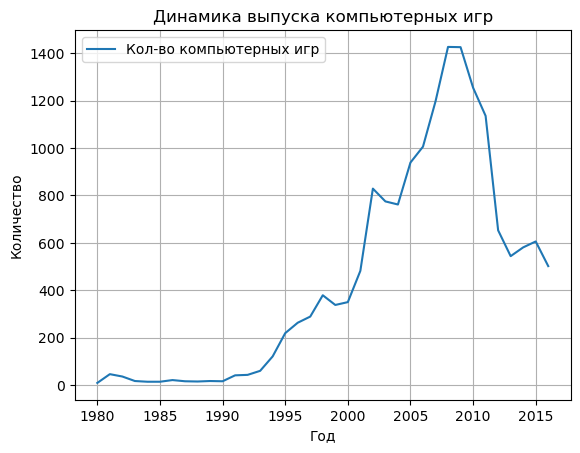

In [19]:
data_1 = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index().query('year_of_release > 0')
data_1.columns = ['year_of_release', 'game_count']
data_1.plot(title='Динамика выпуска компьютерных игр', x='year_of_release', y='game_count', label='Кол-во компьютерных игр', xlabel='Год', ylabel='Количество', grid=True);

Как видно из графика, рост количества выпускаемых игр начался в 90-е годы и пик пришелся на 2008-2009 годы. Далее наблюдается спад, который, скорее всего, вызван ростом популярности мобильных игр и разработкой под мобильные устройства.

#### Динамика продаж компьютерных игр по платформам

Посмотрим, как менялись продажи по платформам. Выберем топ-10 платформ с наибольшими суммарными продажами:

In [20]:
top_10_pltf = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
top_10_pltf.columns = ['platform', 'total_sales']
top_10_pltf = top_10_pltf.sort_values(by='total_sales', ascending=False).head(10)
top_10_pltf

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


Наибольшие продажи ожидаемо имеют компьютерные игры для консолей серии PlayStation и Xbox 360 - одних из самых популярных приставок.

Проследим динамику суммарных продаж по годам по топ-10 платформ:

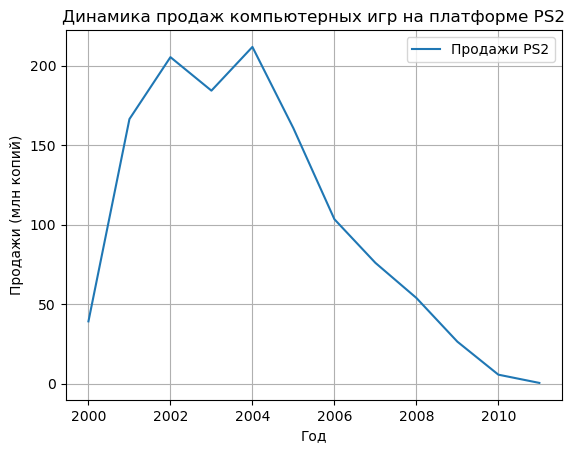

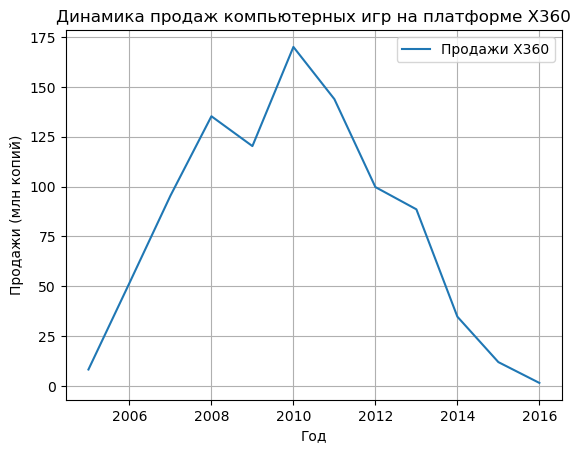

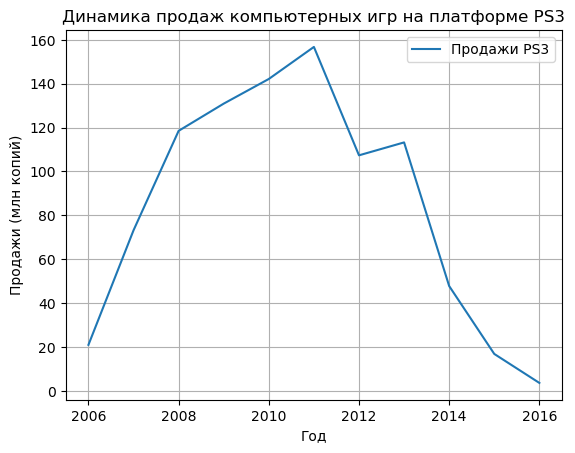

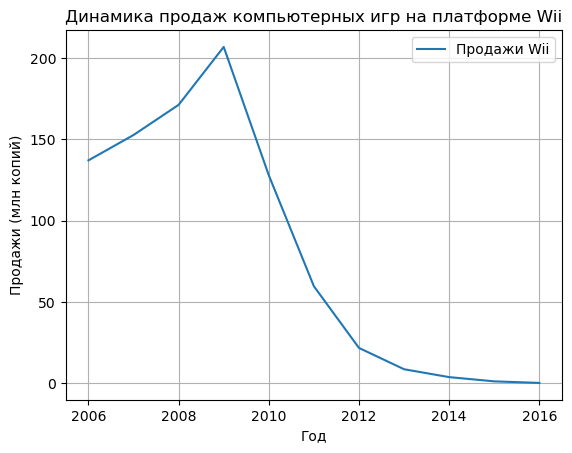

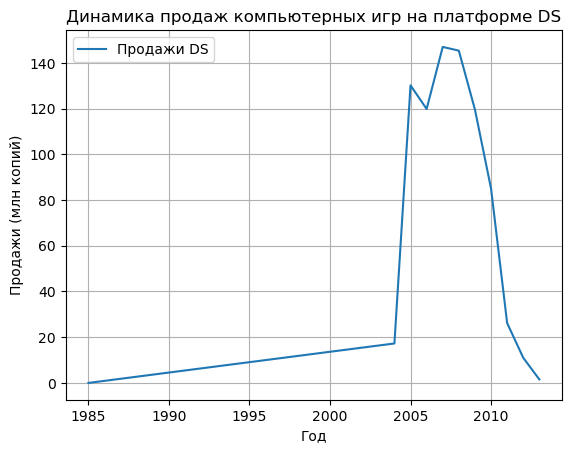

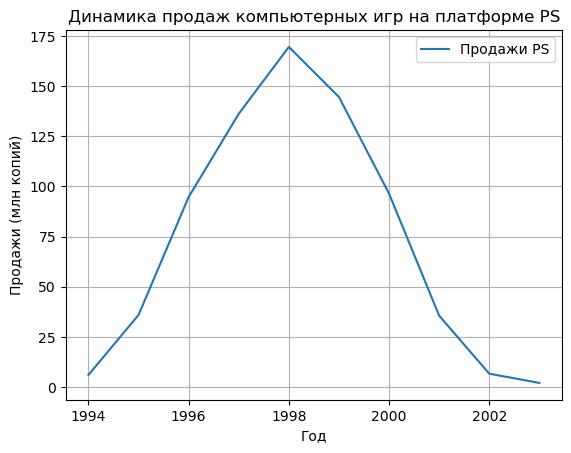

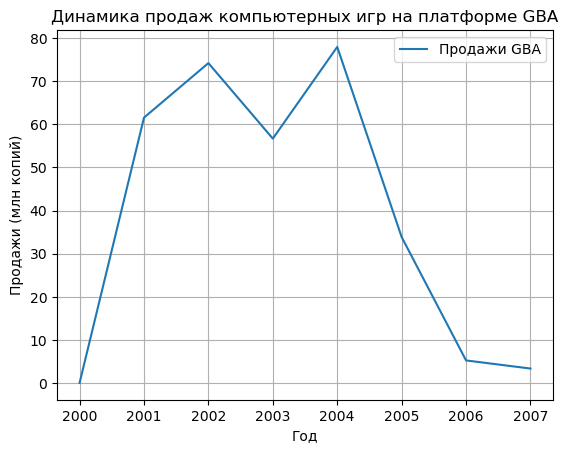

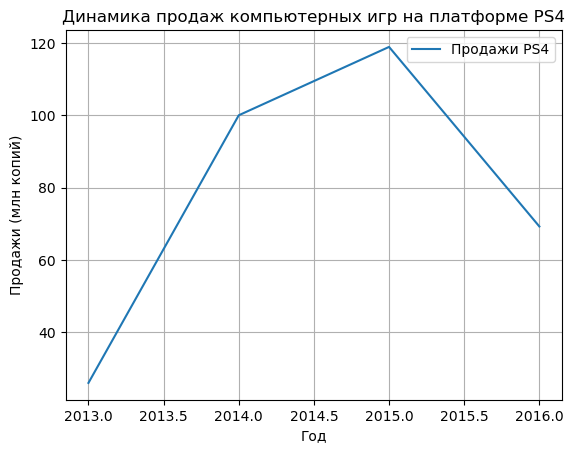

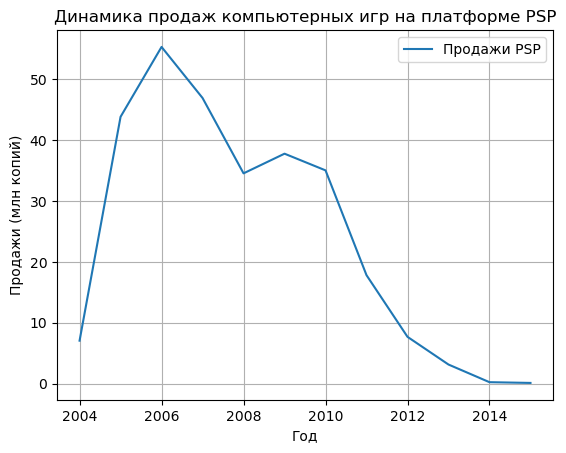

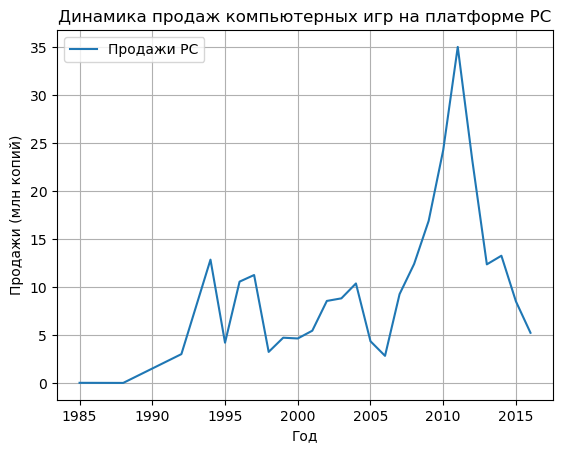

In [21]:
data_2 = data.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index().query('year_of_release > 0')
for i in top_10_pltf['platform']:
    data_2.query(f'platform == "{i}"').plot(title=f'Динамика продаж компьютерных игр на платформе {i}', x='year_of_release', y='total_sales', label=f'Продажи {i}', xlabel='Год', ylabel='Продажи (млн копий)', grid=True);

Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы:

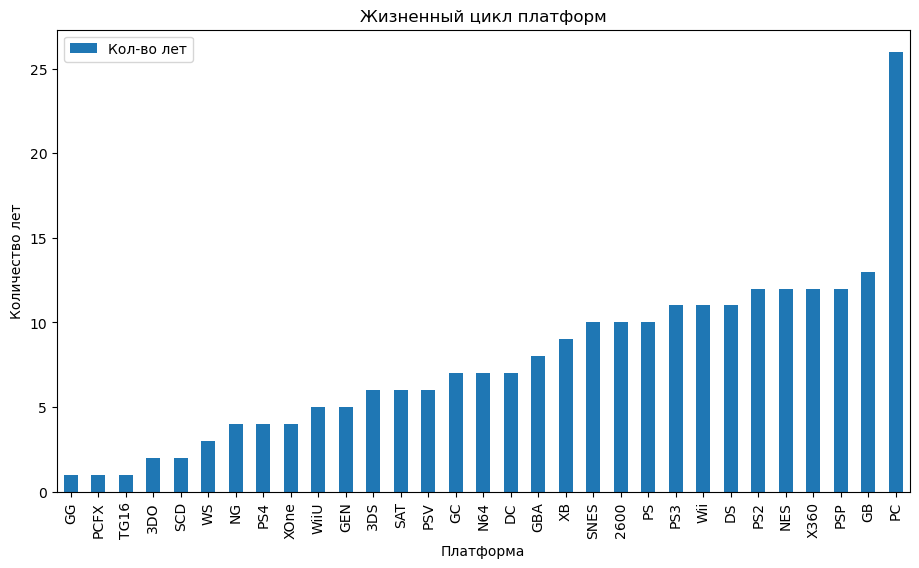

In [22]:
life_cycle = data_2.pivot_table(index='platform', values='year_of_release', aggfunc='count').reset_index().sort_values(by='year_of_release', ascending=True)
life_cycle.plot(kind='bar', x='platform', y='year_of_release', title='Жизненный цикл платформ', label='Кол-во лет', xlabel='Платформа', ylabel='Количество лет', figsize=(11, 6));

In [23]:
life_cycle.describe()

,year_of_release
count,31.000000
mean,7.677419
std,5.081910
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,26.000000


Представленное выше распределение наглядно показывает, что для каждой платформы есть свой жизненный цикл. Характерный срок, в который появляются новые и исчезают старые платформы, составляет, в среднем, около 7 лет.

#### Определение платформ, лидирующих по продажам компьютерных игр

Для построения прогноза на 2017 год будем использовать данные текущего, 2016 года, и так как жизненный цикл платформ составляет, как мы выснили выше, около 7 лет, то можно рассматривать прошлые периоды в этот промежуток времени. Но все же так как прогноз в крупных компаниях правильно считать за последние 2-3 года, а мы проводим исследование сферы видеоигр, где все быстро меняется, то для дальнейшего исследования возьмем период 2014-2016 года:

In [24]:
current_data = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]
unique_platform = current_data['platform'].unique()

Выясним, какие платформы лидируют по продажам (растут или падают) и выберем из них несколько потенциально прибыльных, если такое возможно.

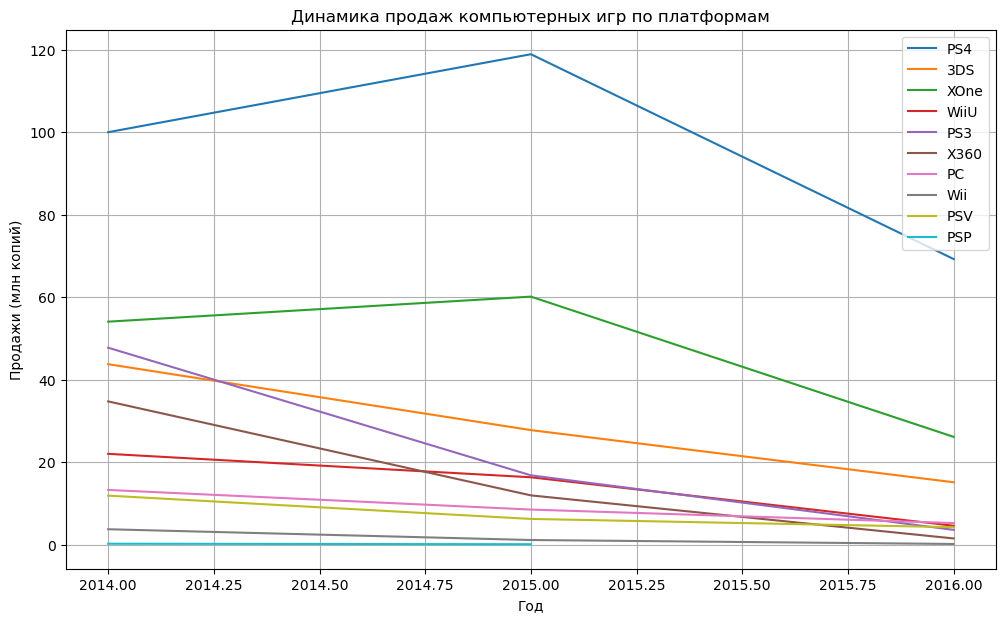

In [25]:
current_sales = current_data.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()
plt.figure(figsize=(12, 7))
for i in unique_platform:
    tmp = current_sales.query(f'platform == "{i}"')
    plt.plot(tmp['year_of_release'], tmp['total_sales'])
plt.legend(unique_platform)
plt.title('Динамика продаж компьютерных игр по платформам')
plt.xlabel('Год')
plt.ylabel('Продажи (млн копий)')
plt.grid(True);

Наблюдается отрицательная динамика продаж компьютерных игр по платформам за период 2010-2016 годы. Общий тренд на падение продаж, вероятно, связан с возросшей популярностью мобильных платформ. Потенциально прибыльные платформы - PlayStation 4 и Xbox One, но тренд на падение продаж налицо.

#### Размах продаж компьютерных игр по платформам

Построим диаграмму размаха (график "ящик с усами") по глобальным продажам игр в разбивке по платформам:

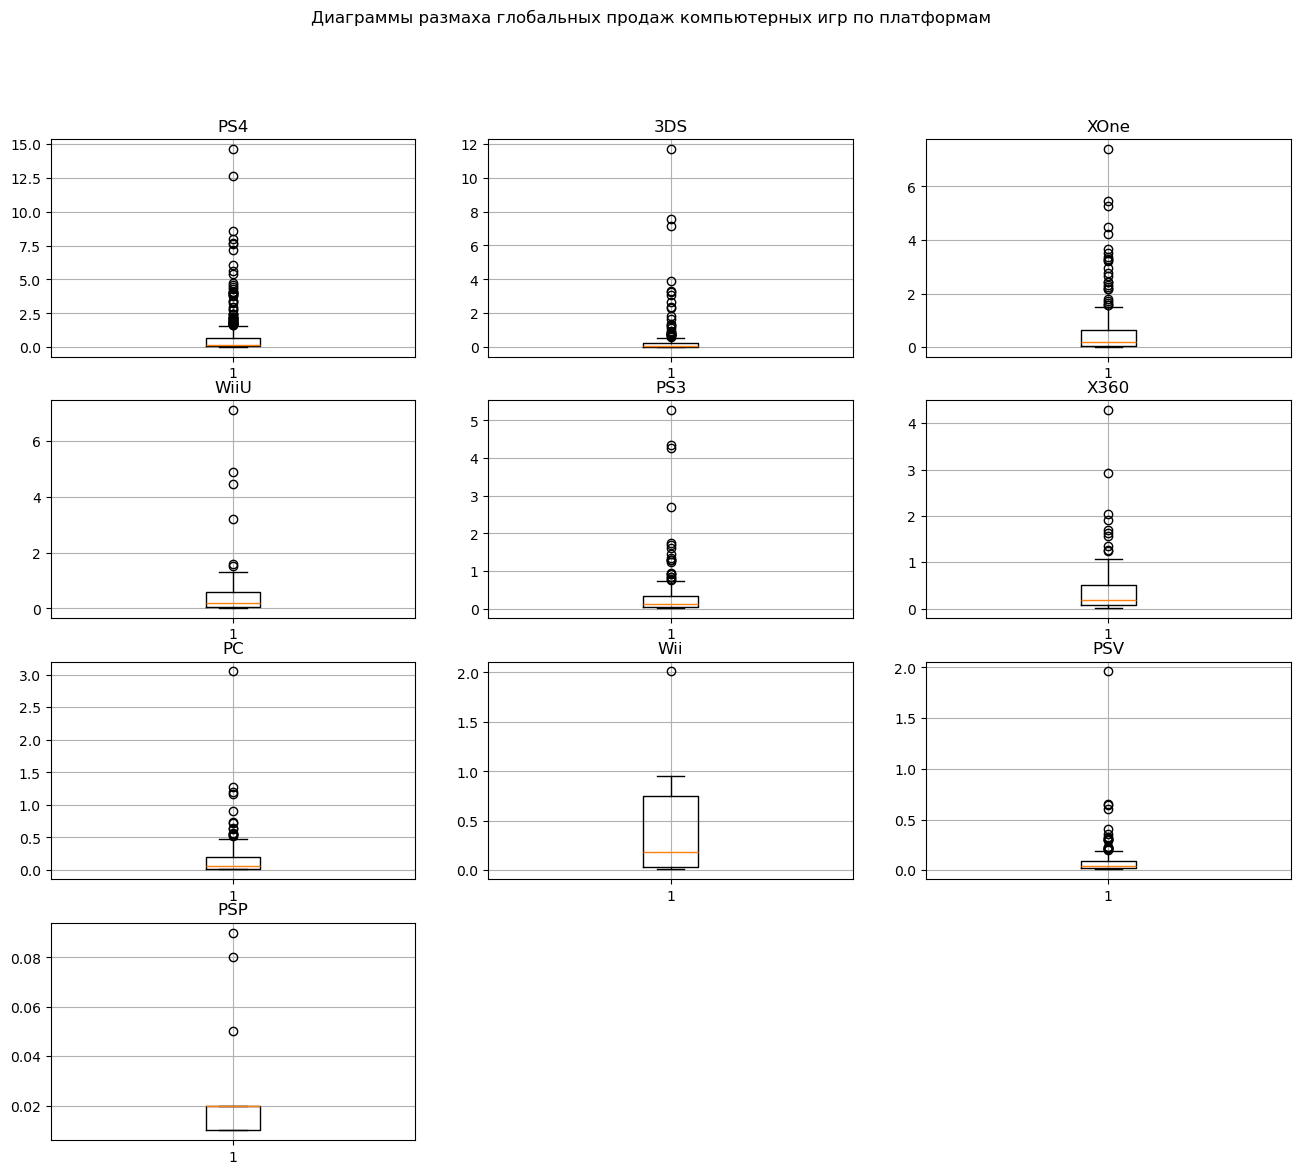

In [26]:
plt.figure(figsize=(16, 13)).suptitle('Диаграммы размаха глобальных продаж компьютерных игр по платформам')
for i in unique_platform:
    plt.subplot(4, 3, list(unique_platform).index(i) + 1)
    plt.boxplot(current_data.query(f'platform == "{i}"')['total_sales'])
    plt.title(i)
    plt.grid(True)
plt.show()

Глобальные продажи каждой игровой платформы имеют большое количество "выбросов", которые являются хитами компьютерных игр, которые могут собирать десятки миллионов продаж. Такие аномалии не стоит исключать из выборки данных.

#### Влияние на продажи компьютерных игр оценок критиков и пользователей

Как уже было установлено ранее, одной из популярных игровых платформ в актуальный период является PlayStation 4. Посмотрим, как влияют на продажи внутри этой платформы отзывы критиков и пользователей.

In [27]:
current_data_ps4_cs = current_data.query('platform == "PS4" and critic_score > 0')
current_data_ps4_us = current_data.query('platform == "PS4" and user_score > 0')

Построим диаграмму рассеяния и посчитаем корреляцию между оценками критиков и глобальными продажами:

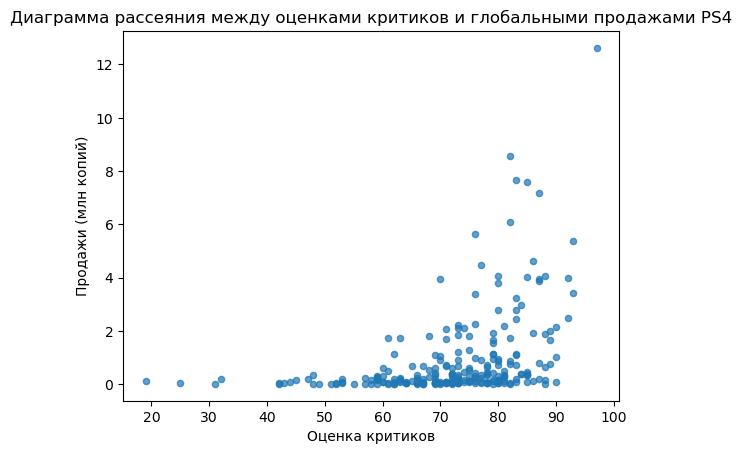

In [28]:
current_data_ps4_cs.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7, title='Диаграмма рассеяния между оценками критиков и глобальными продажами PS4', xlabel='Оценка критиков', ylabel='Продажи (млн копий)');

Рассчитаем коэффициент корреляции Пирсона:

In [29]:
current_data_ps4_cs['critic_score'].corr(current_data_ps4_cs['total_sales'])

0.40266141068104083

Построим диаграмму рассеяния и посчитаем корреляцию между оценками пользователей и глобальными продажами:

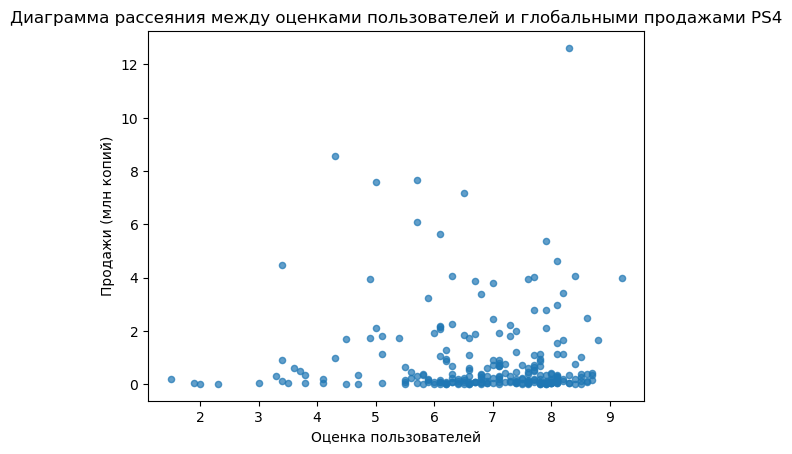

In [30]:
current_data_ps4_us.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7, title='Диаграмма рассеяния между оценками пользователей и глобальными продажами PS4', xlabel='Оценка пользователей', ylabel='Продажи (млн копий)');

Рассчитаем коэффициент корреляции Пирсона:

In [31]:
current_data_ps4_us['user_score'].corr(current_data_ps4_us['total_sales'])

-0.040131589472697356

Таким образом, можно сказать, что для платформы PlayStation 4 корреляция между продажами и пользовательскими отзывами отсутствует, в тоже время оценки критиков коррелируют: 0,4 - средняя зависимость, положительная.

Проведем аналогичный анализ для другой популярной платформы - Xbox One.

In [32]:
current_data_xone_cs = current_data.query('platform == "XOne" and critic_score > 0')
current_data_xone_us = current_data.query('platform == "XOne" and user_score > 0')

Построим диаграмму рассеяния и посчитаем корреляцию между оценками критиков и глобальными продажами:

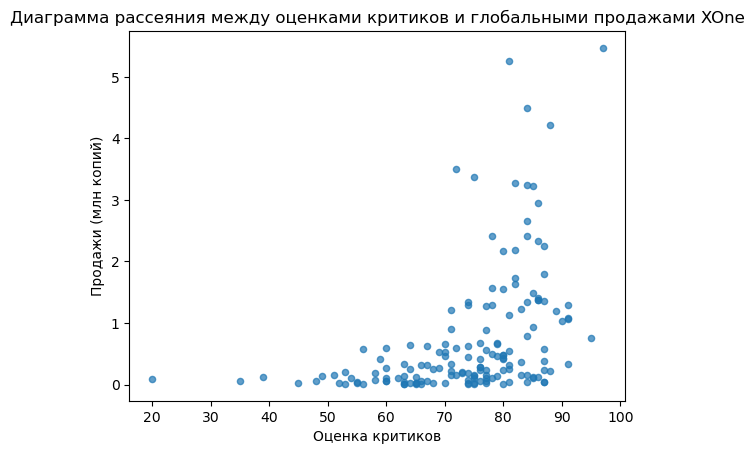

In [33]:
current_data_xone_cs.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7, title='Диаграмма рассеяния между оценками критиков и глобальными продажами XOne', xlabel='Оценка критиков', ylabel='Продажи (млн копий)');

Рассчитаем коэффициент корреляции Пирсона:

In [34]:
current_data_xone_cs['critic_score'].corr(current_data_xone_cs['total_sales'])

0.42867694370333226

Построим диаграмму рассеяния и посчитаем корреляцию между оценками пользователей и глобальными продажами:

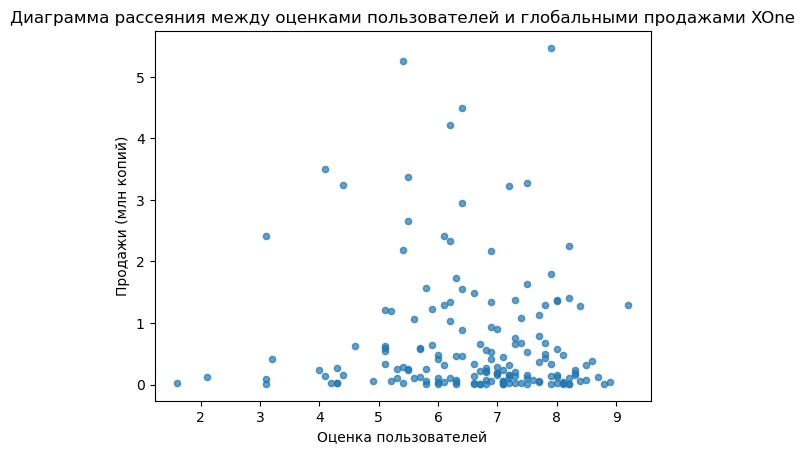

In [35]:
current_data_xone_us.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7, title='Диаграмма рассеяния между оценками пользователей и глобальными продажами XOne', xlabel='Оценка пользователей', ylabel='Продажи (млн копий)');

Рассчитаем коэффициент корреляции Пирсона:

In [36]:
current_data_xone_us['user_score'].corr(current_data_xone_us['total_sales'])

-0.0703839280647581

Для платформы Xbox One получились те же самые результаты, что и для платформы PlayStation 4.

Таким образом, отзывы пользователей в большей части слабо коррелируют и в отрицательную сторону, что не совпадает с отзывами критиков, т.к. тут наблюдается средневыраженная зависимость (около 0.4). Можно сделать вывод о том, что критики более точно прогнозируют успех игры, в отличие от пользователей.

#### Распределение компьютерных игр по жанрам

Построим общее распределение игр по жанрам в 2010-2016 годах:

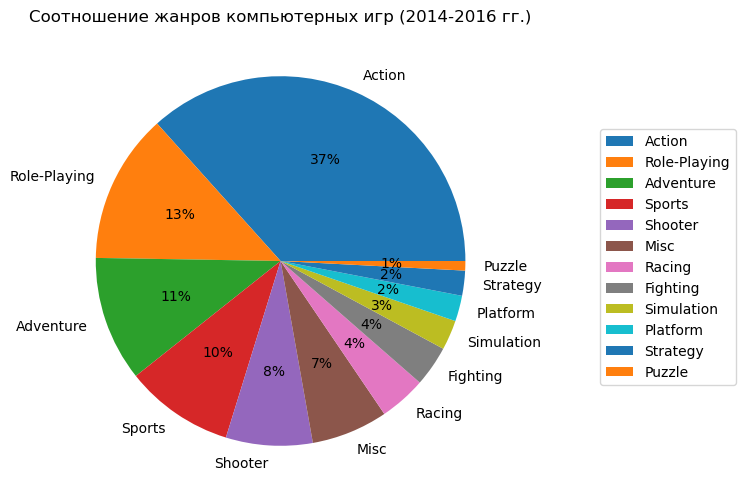

In [37]:
current_data['genre'].value_counts().plot(kind='pie', legend=True, ylabel='', title='Соотношение жанров компьютерных игр (2014-2016 гг.)', autopct='%1.0f%%', figsize=(11, 6));
plt.legend(bbox_to_anchor=(1.5, 0.8));

В рассматриваемом нами периоде (2014-2016 года) наибольшую долю на рынке занимают компьютерные игры в жанре Action, затем с равными долями - жанры Misc, Sports, Role-Playing и Adventure. Самая низкая доля у игр с жанрами Puzzle, Platform и Strategy.

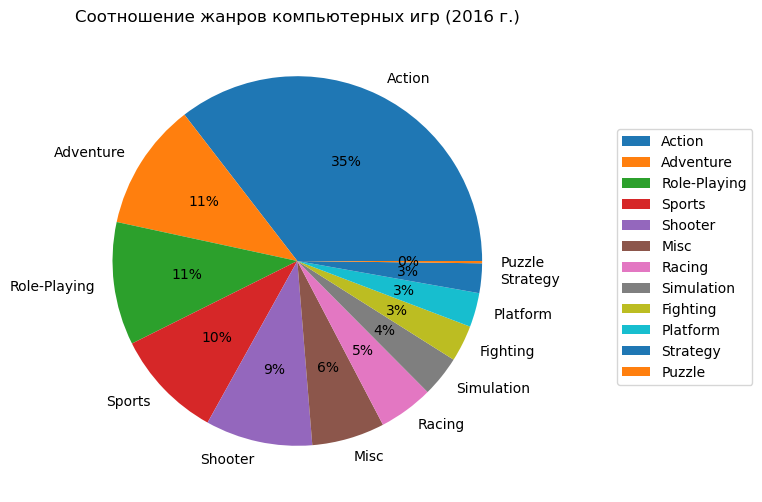

In [38]:
current_data[current_data['year_of_release'] == 2016]['genre'].value_counts().plot(kind='pie', legend=True, ylabel='', title='Соотношение жанров компьютерных игр (2016 г.)', autopct='%1.0f%%', figsize=(11, 6));
plt.legend(bbox_to_anchor=(1.5, 0.8));

В текущем году просматривается тенденция увеличение доли компьютерных игр жанар Action и уменьшение долей игр с жанрами Misc, Puzzle и т.д.

Рассмотрим суммарные и средние продажи компьютерных игр по жанрам в актуальном периоде:

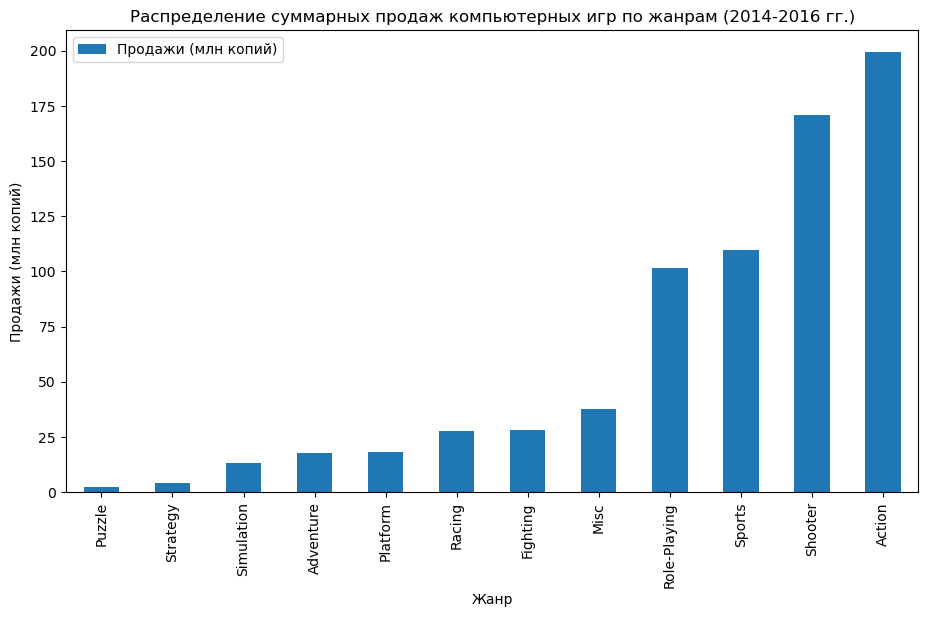

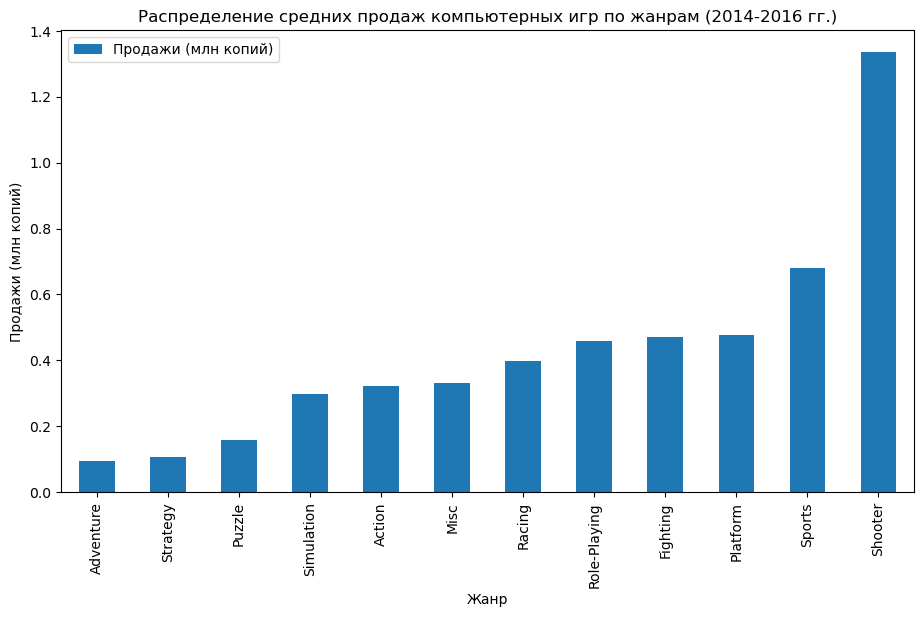

In [39]:
genre_1 = current_data.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean']).reset_index()
genre_1.columns = ['genre', 'sum_total_sales', 'mean_total_sales']
genre_1.sort_values(by='sum_total_sales', ascending=True).plot(kind='bar', x='genre', y='sum_total_sales', title='Распределение суммарных продаж компьютерных игр по жанрам (2014-2016 гг.)', label='Продажи (млн копий)', xlabel='Жанр', ylabel='Продажи (млн копий)', figsize=(11, 6));
genre_1.sort_values(by='mean_total_sales', ascending=True).plot(kind='bar', x='genre', y='mean_total_sales', title='Распределение средних продаж компьютерных игр по жанрам (2014-2016 гг.)', label='Продажи (млн копий)', xlabel='Жанр', ylabel='Продажи (млн копий)', figsize=(11, 6));

Распределение суммарных и средних продаж компьютерных игр по жанрам в 2014-2016 годах показывает разных лидеров и аутсайдеров. Например, если жанр Action лидирует по суммарным продажам, то по средним продажам он занимает только 8-е место. Это говорит о том, что высокие продажи могут быть вызваны не только успехом, но и просто большим количеством игр. Также могут быть жанры, где игр немного, но при этом продажи сопоставимы с продажами лидеров.

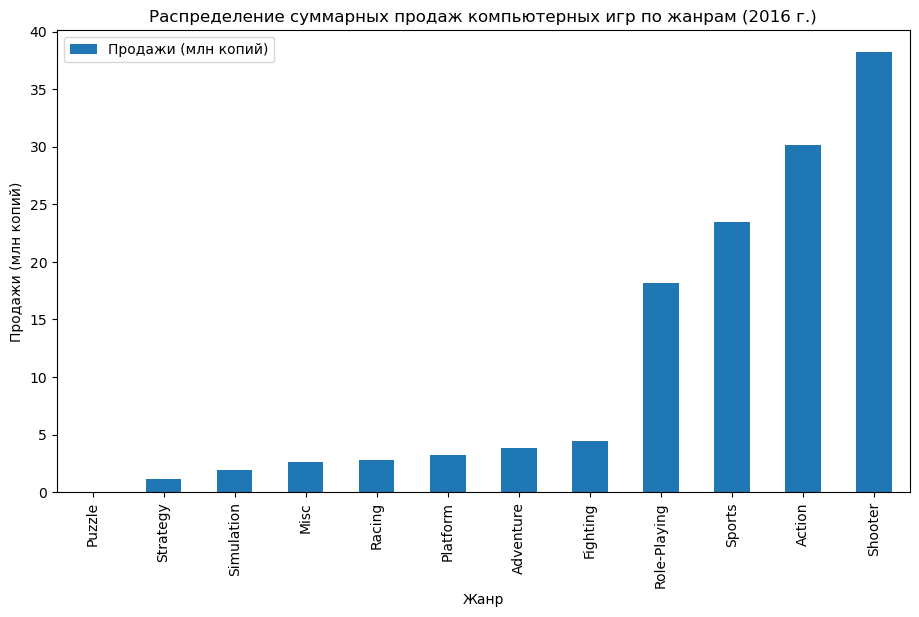

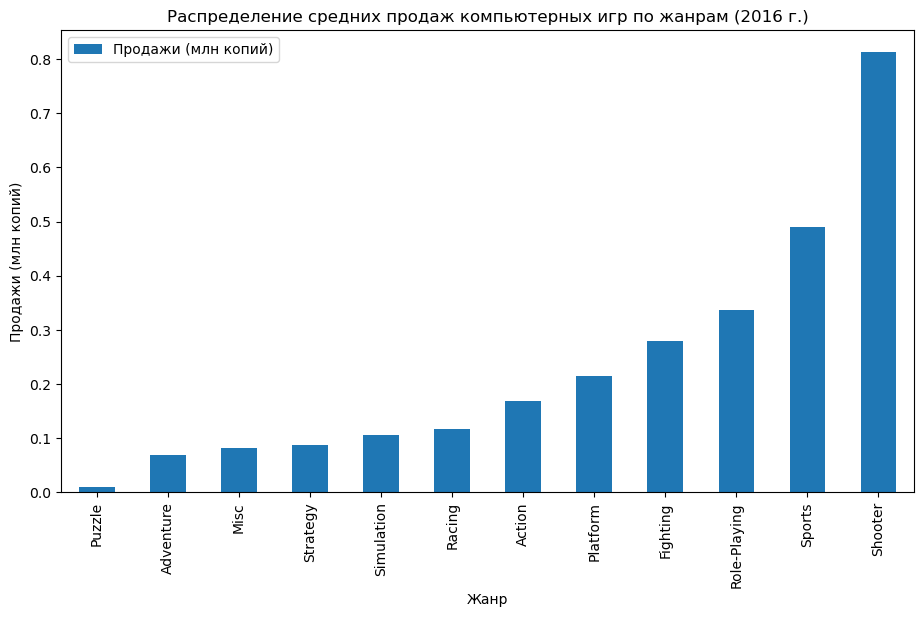

In [40]:
genre_2 = current_data[current_data['year_of_release'] == 2016].pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean']).reset_index()
genre_2.columns = ['genre', 'sum_total_sales', 'mean_total_sales']
genre_2.sort_values(by='sum_total_sales', ascending=True).plot(kind='bar', x='genre', y='sum_total_sales', title='Распределение суммарных продаж компьютерных игр по жанрам (2016 г.)', label='Продажи (млн копий)', xlabel='Жанр', ylabel='Продажи (млн копий)', figsize=(11, 6));
genre_2.sort_values(by='mean_total_sales', ascending=True).plot(kind='bar', x='genre', y='mean_total_sales', title='Распределение средних продаж компьютерных игр по жанрам (2016 г.)', label='Продажи (млн копий)', xlabel='Жанр', ylabel='Продажи (млн копий)', figsize=(11, 6));

В 2016 году картина с продажами компьютерных игр похожая с периодом 2014-2016 годов. В лидерах по продажам - компьютерные игры с жанром Shooter. Распределения продаж за 2016 год еще раз подтверждает выводы, сделанные выше - ориентироваться только на суммарные продажи нельзя, необходима также оценка и средних продаж.

### Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5) и самые популярные жанры (топ-5). Рассматривать будем данные только за 2016 год.

In [41]:
data_2016 = data[data['year_of_release'] == 2016]
region_col = ['na_sales', 'eu_sales', 'jp_sales']

Популярность платформ и жанров может определяться на основании различных факторов:
* суммарным рейтингом критиков
* суммарным рейтингом пользователей
* количеством выпущенных игр
* суммарными продажами в разных регионах

#### Определение популярных платформ

Рассчитаем описанные выше показатели по платформам компьютерных игр:

In [42]:
data_2016_platform = data_2016.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'critic_score', 'user_score'], aggfunc=['sum', 'count']).reset_index()
data_2016_platform.columns = ['platform', 'critic_score', 'eu_sales', 'jp_sales', 'na_sales', 'user_score', 'games_count', 'delete_1', 'delete_2', 'delete_3', 'delete_4']
data_2016_platform.drop(['delete_1', 'delete_2', 'delete_3', 'delete_4'], axis=1)

,platform,critic_score,eu_sales,jp_sales,na_sales,user_score,games_count
0,3DS,719.0,2.33,8.03,4.14,88.4,46
1,PC,3402.0,3.53,0.00,1.36,283.4,54
2,PS3,0.0,1.26,1.30,0.67,39.7,38
3,PS4,7024.0,31.78,5.74,21.49,694.3,164
4,PSV,743.0,0.39,3.56,0.15,101.1,85
5,Wii,0.0,0.11,0.00,0.06,0.0,1
6,WiiU,654.0,1.48,0.67,2.10,65.4,14
7,X360,0.0,0.71,0.00,0.69,29.2,13
8,XOne,4430.0,9.63,0.01,14.27,435.5,87


Отобразим рейтинг топ-5 платформ по первым трем факторам (оценки критиков, оценки пользователей, количество игр):

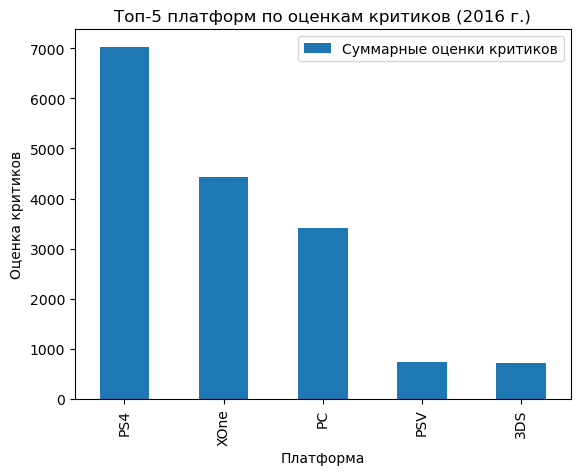

In [43]:
data_2016_platform[['platform', 'critic_score']].sort_values(by='critic_score', ascending=False).head(5)\
.plot(kind='bar', x='platform', y='critic_score', title='Топ-5 платформ по оценкам критиков (2016 г.)', label='Суммарные оценки критиков', xlabel='Платформа', ylabel='Оценка критиков');

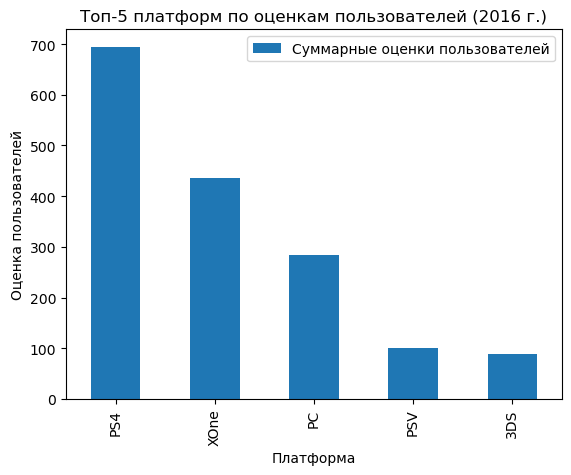

In [44]:
data_2016_platform[['platform', 'user_score']].sort_values(by='user_score', ascending=False).head(5)\
.plot(kind='bar', x='platform', y='user_score', title='Топ-5 платформ по оценкам пользователей (2016 г.)', label='Суммарные оценки пользователей', xlabel='Платформа', ylabel='Оценка пользователей');

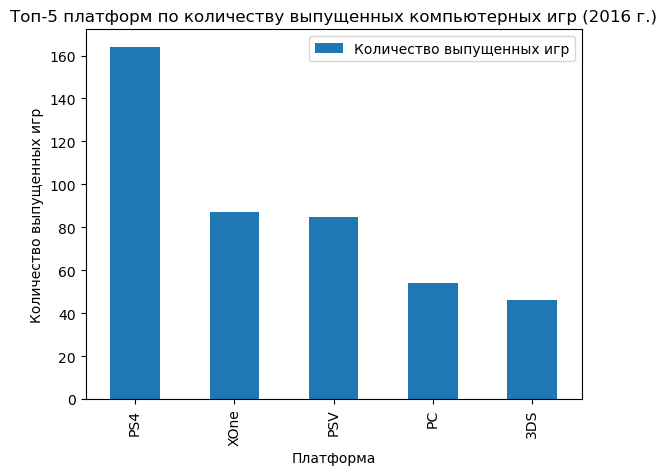

In [45]:
data_2016_platform[['platform', 'games_count']].sort_values(by='games_count', ascending=False).head(5)\
.plot(kind='bar', x='platform', y='games_count', title='Топ-5 платформ по количеству выпущенных компьютерных игр (2016 г.)', label='Количество выпущенных игр', xlabel='Платформа', ylabel='Количество выпущенных игр');

Топ-5 платформ - PS4, XOne, PC, PSV и 3DS. Оценки пользователей и критиков сходятся, но в рейтинге выпущенных компьютерных игр платформа PSV опережает PC.

Отобразим рейтинг топ-5 платформ по продажам для каждого региона:

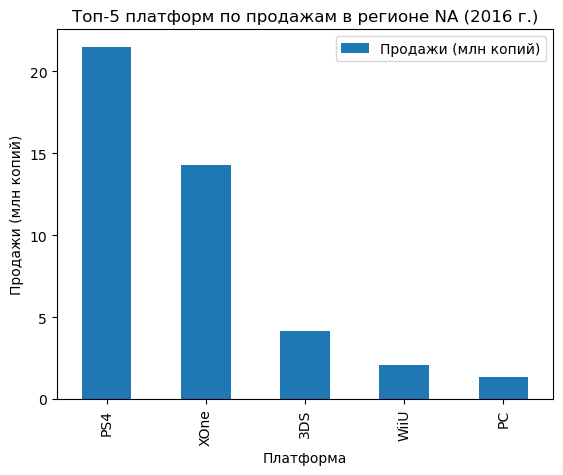

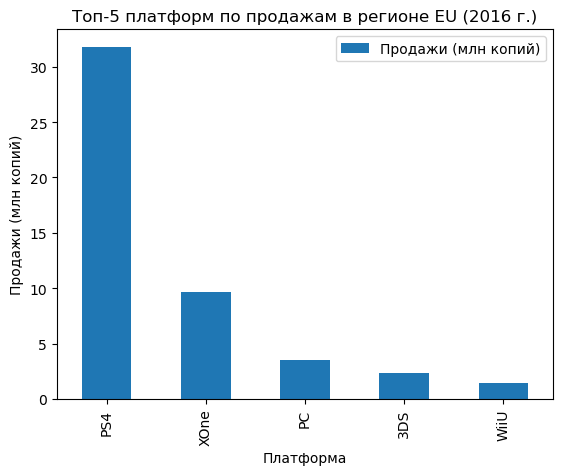

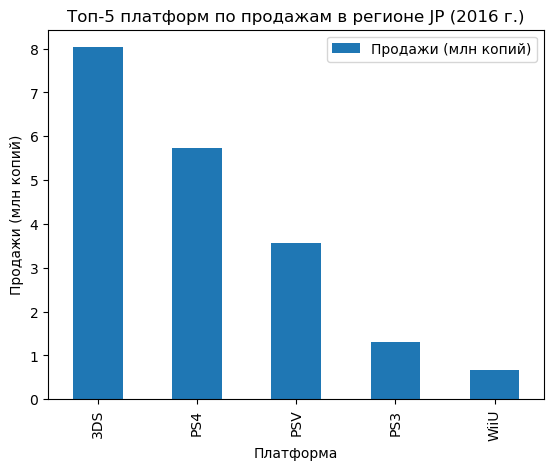

In [46]:
for i in region_col:
    region = i.split(sep='_')[0].upper()
    data_2016_platform[['platform', i]].sort_values(by=i, ascending=False).head(5)\
    .plot(kind='bar', x='platform', y=i, title=f'Топ-5 платформ по продажам в регионе {region} (2016 г.)', label='Продажи (млн копий)', xlabel='Платформа', ylabel='Продажи (млн копий)');

Популярность платформ по регионам различается. В Северной Америке и Европе пользовали предпочитают компьютерные игры на платформах PS4 и XOne, причем в Европе доля платформы PS4 очень высока. В Японии большую популярность имеют платформы 3DS и PS4. Что характерно для Японии - в топ-5 платформ не входит PC, что говорит о том, что японские геймеры предпочитают консоли, нежели ПК.

#### Определение популярных жанров

Рассчитаем описанные выше показатели по жанрам компьютерных игр:

In [47]:
data_2016_genre = data_2016.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'critic_score', 'user_score'], aggfunc=['sum', 'count']).reset_index()
data_2016_genre.columns = ['genre', 'critic_score', 'eu_sales', 'jp_sales', 'na_sales', 'user_score', 'games_count', 'delete_1', 'delete_2', 'delete_3', 'delete_4']
data_2016_genre.drop(['delete_1', 'delete_2', 'delete_3', 'delete_4'], axis=1)

,genre,critic_score,eu_sales,jp_sales,na_sales,user_score,games_count
0,Action,4840.0,10.68,7.07,9.29,564.3,178
1,Adventure,1326.0,1.32,1.18,0.95,144.4,56
2,Fighting,739.0,1.34,0.75,1.84,68.7,16
3,Misc,436.0,0.66,1.04,0.76,45.1,32
4,Platform,758.0,1.39,0.11,1.29,50.5,15
5,Puzzle,0.0,0.01,0.00,0.00,0.0,1
6,Racing,1121.0,1.77,0.01,0.73,120.6,24
7,Role-Playing,1602.0,4.28,6.61,5.89,169.2,54
8,Shooter,2886.0,15.90,1.06,16.24,250.4,47
9,Simulation,640.0,1.27,0.33,0.16,63.0,18


Отобразим рейтинг топ-5 платформ по первым трем факторам (оценки критиков, оценки пользователей, количество игр):

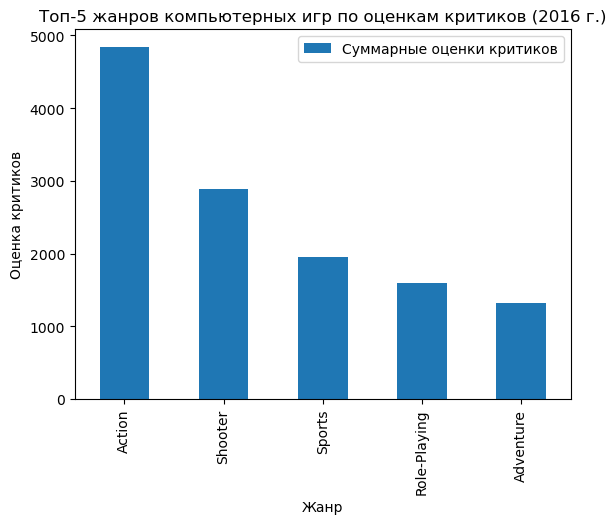

In [48]:
data_2016_genre[['genre', 'critic_score']].sort_values(by='critic_score', ascending=False).head(5)\
.plot(kind='bar', x='genre', y='critic_score', title='Топ-5 жанров компьютерных игр по оценкам критиков (2016 г.)', label='Суммарные оценки критиков', xlabel='Жанр', ylabel='Оценка критиков');

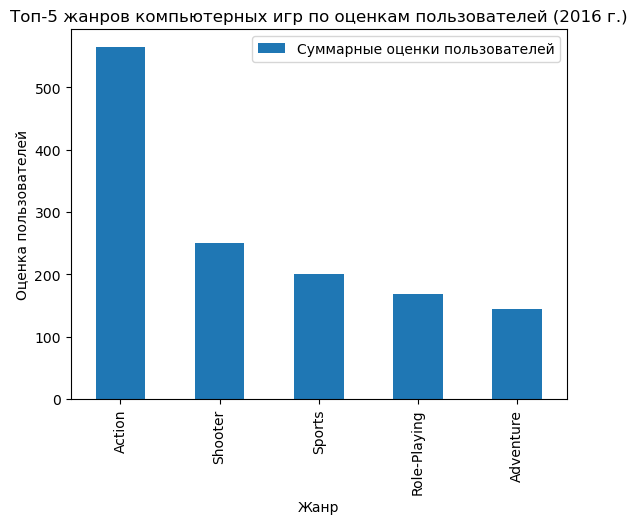

In [49]:
data_2016_genre[['genre', 'user_score']].sort_values(by='user_score', ascending=False).head(5)\
.plot(kind='bar', x='genre', y='user_score', title='Топ-5 жанров компьютерных игр по оценкам пользователей (2016 г.)', label='Суммарные оценки пользователей', xlabel='Жанр', ylabel='Оценка пользователей');

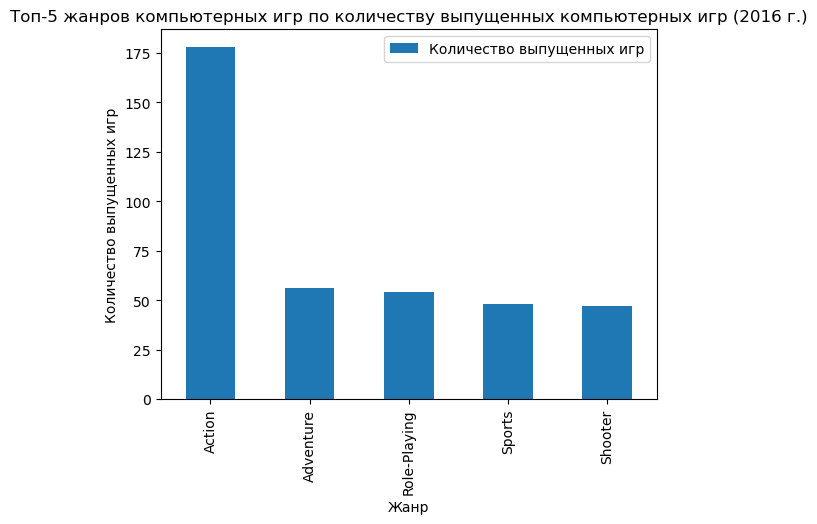

In [50]:
data_2016_genre[['genre', 'games_count']].sort_values(by='games_count', ascending=False).head(5)\
.plot(kind='bar', x='genre', y='games_count', title='Топ-5 жанров компьютерных игр по количеству выпущенных компьютерных игр (2016 г.)', label='Количество выпущенных игр', xlabel='Жанр', ylabel='Количество выпущенных игр');

Топ-5 жанров - Action, Shooter, Sports, Role-Playing и Adventure. Оценки пользователей и критиков сходятся, в рейтинге выпущенных компьютерных игр наибольшую долю занимает жанр Action.

Отобразим рейтинг топ-5 жанров по продажам для каждого региона:

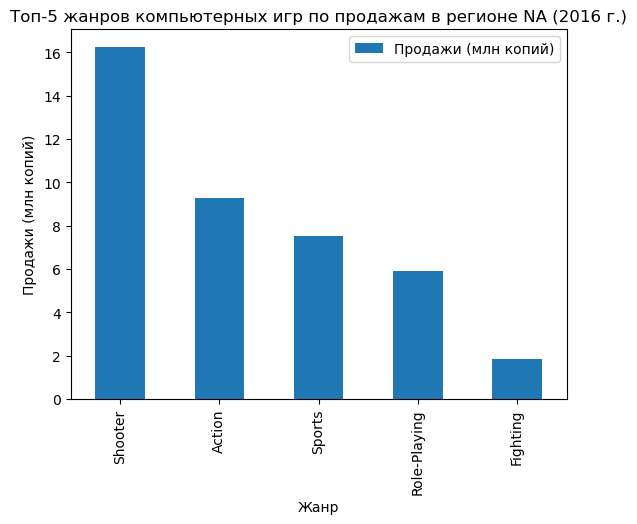

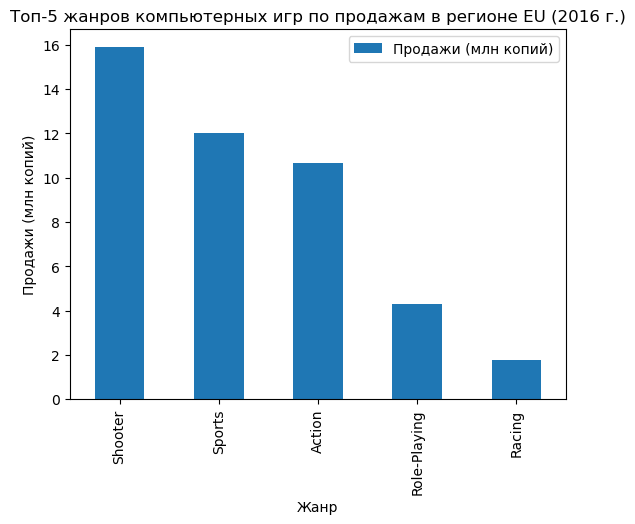

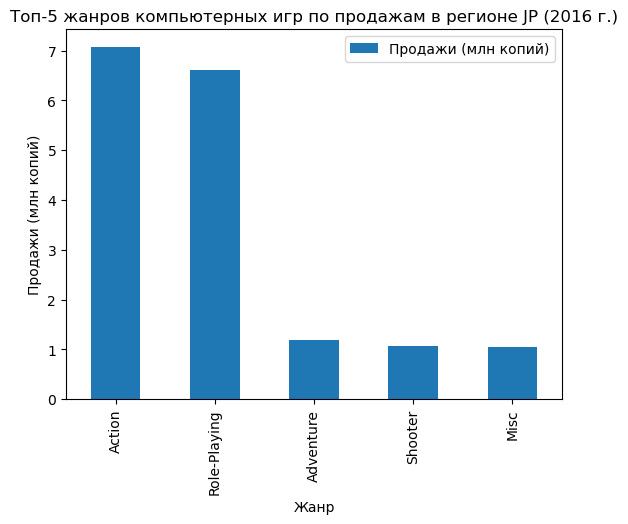

In [51]:
for i in region_col:
    region = i.split(sep='_')[0].upper()
    data_2016_genre[['genre', i]].sort_values(by=i, ascending=False).head(5)\
    .plot(kind='bar', x='genre', y=i, title=f'Топ-5 жанров компьютерных игр по продажам в регионе {region} (2016 г.)', label='Продажи (млн копий)', xlabel='Жанр', ylabel='Продажи (млн копий)');

Популярность жанров по регионам различается. В Северной Америке и Европе пользовали предпочитают компьютерные игры в жанрах Shooter, Action и Sports. В Японии большую популярность имеют жанры Action и Role-Playing - геймеры Японии предпочитают данные жанры остальным.

#### Влияние рейтинга ESRB на продажи в регионах

Проверим, оказывает ли влияние рейтинг ESRB на продажи в регионах.

In [52]:
data_2016_rating = data_2016.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
data_2016_rating

,rating,eu_sales,jp_sales,na_sales
0,E,13.61,1.07,7.97
1,E10+,3.81,0.45,3.81
2,M,16.54,1.20,15.67
3,None,7.47,14.32,8.53
4,T,9.79,2.27,8.95


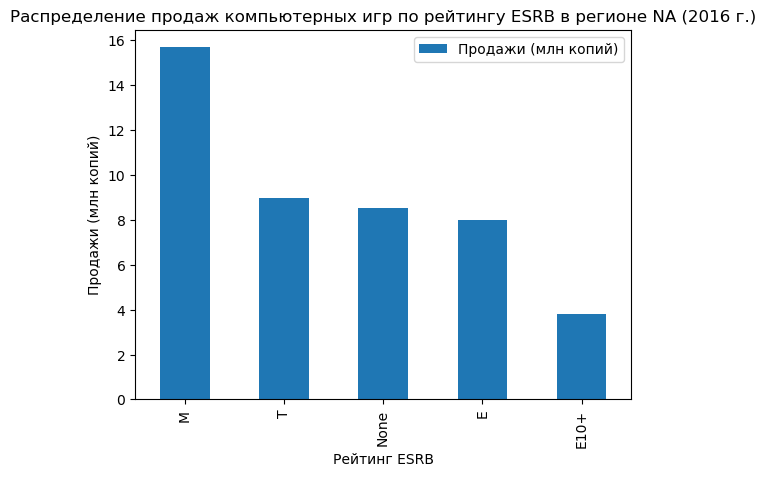

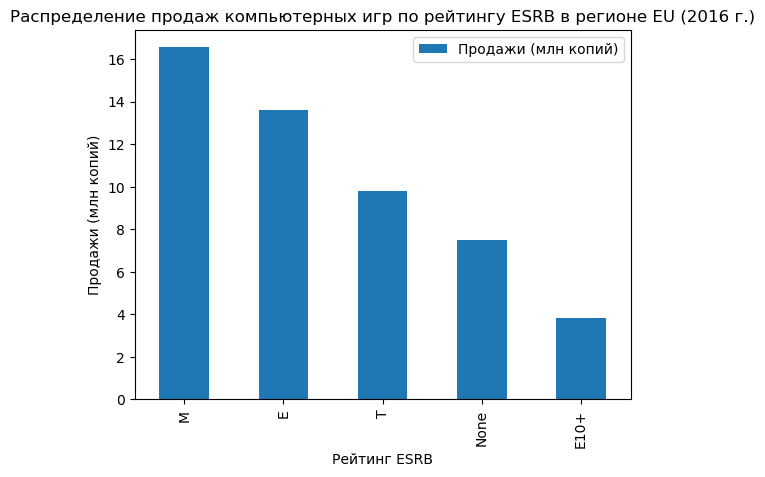

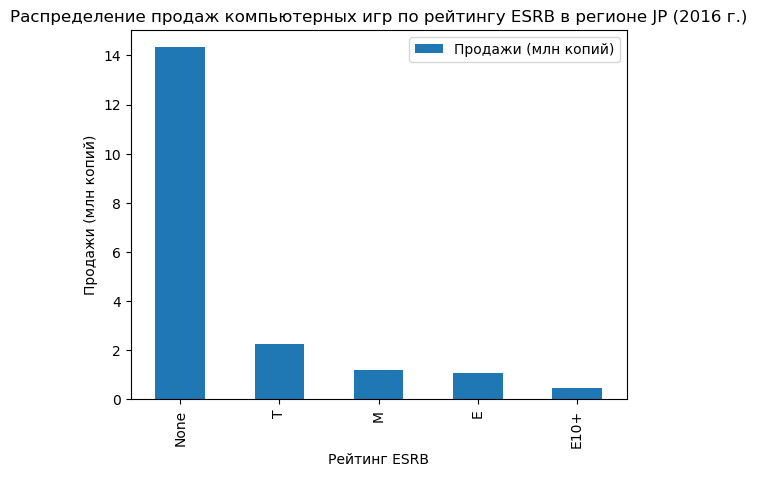

In [53]:
for i in region_col:
    region = i.split(sep='_')[0].upper()
    data_2016_rating[['rating', i]].sort_values(by=i, ascending=False)\
    .plot(kind='bar', x='rating', y=i, title=f'Распределение продаж компьютерных игр по рейтингу ESRB в регионе {region} (2016 г.)', label='Продажи (млн копий)', xlabel='Рейтинг ESRB', ylabel='Продажи (млн копий)');

Прослеживается влияние рейтинга ESRB на продажи в регионах. В Северной Америке и Европе компьютерные игры, имеющие рейтинг ESRB, равный M, имеют наибольшие продажи, а игры с рейтингом E10+ - наименьшие продажи. В Японии суммарные продажи у компьютерных игр без рейтинга выше.

### Проверка гипотез

Проверим две гипотезы, для всех проверяемых гипотез зададим один уровень значимости:

In [54]:
alpha = 0.05

#### Гипотеза 1

Проверим гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Т.к. выборки данных с пользовательскими рейтингами платформ независимы, то для проверки гипотезы будем использовать двухвыборочный t-тест для независимых выборок.

*Нулевая гипотеза*: средние пользовательские рейтинги платформ Xbox One и PC равны.

*Альтернативная гипотеза*: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [55]:
results = st.ttest_ind(data.query('platform == "PC" and user_score > 0')['user_score'],
                       data.query('platform == "XOne" and user_score > 0')['user_score'])
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC не равны со статистической значимостью 0.05.

#### Гипотеза 2

Проверим гипотезу - средние пользовательские рейтинги жанров Action и Sports разные.  Т.к. выборки данных с пользовательскими рейтингами платформ независимы, то для проверки гипотезы будем использовать двухвыборочный t-тест для независимых выборок.

*Нулевая гипотеза*: средние пользовательские рейтинги жанров Action и Sports равны.

*Альтернативная гипотеза*: средние пользовательские рейтинги жанров Action и Sports не равны.

In [56]:
results = st.ttest_ind(data.query('genre == "Action" and user_score > 0')['user_score'],
                       data.query('genre == "Sports" and user_score > 0')['user_score'])
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.10406951359049141
Нет оснований отвергнуть нулевую гипотезу


Полученное значение p-value больше заданного уровня значимости, поэтому нет оснований отвергнуть нулевую гипотезу. Есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports равны со статистической значимостью 0.05.

### Общий вывод

В ходе исследования были проанализированы исторические данные о продажах интернет-магазина "Стримчик", который продает по всему миру компьютерные игры.

Предобработка данных включала в себя:
1. Замена названий столбцов - приведение их к нижнему регистру.
2. Преобразование данных в нужные типы.
3. Обработка пропусков.
4. Подсчет суммарных продаж во всех регионах.

Проведенный исследовательский анализ данных показал:
1. Рост количества выпускаемых игр начался в 90-е годы, пик пришелся на 2008-2009 годы. Наблюдаемый в текущий период спад скорее всего вызван насыщением рынка, ростом популярности мобильных игр и разработкой под мобильные устройства.
2. За весь рассматриваеаый период наибольшие продажи налюдаются у компьютерных игр для консолей серии PlayStation и Xbox 360 - это одни из самых популярных приставок.
3. Исследуемы данные показали, что для каждой платформы есть свой жизненный цикл - срок, в который появляются новые и исчезают старые платформы, составляет, в среднем, около 7 лет.
4. Наблюдается отрицательная динамика продаж компьютерных игр по платформам за период 2010-2016 годы. Общий тренд на падение продаж, вероятно, связан с возросшей популярностью мобильных платформ. Потенциально прибыльные платформы - PlayStation 4 и Xbox One, но прослеживается тренд на падение продаж.
5. Глобальные продажи каждой игровой платформы имеют большое количество "выбросов" - это хиты компьютерных игр, которые собирали десятки миллионов продаж.
6. Анализ влияния на продажи компьютерных игр оценок критиков и пользователей показал, что критики более точно прогнозируют успех игры, в отличие от обычных пользователей.
7. В 2016 году лидируют по продажам игры жанра Shooter, причем они в компании с играми жанров Action, Sports и Role-Playing занимают львиную долю продаж.

Составлены портреты пользователя каждого региона в 2016 году:
1. Топ-5 платформ:
* по оценкам критиков: PS4, XOne, PC, PSV, 3DS
* по оценкам пользователей: PS4, XOne, PC,  3DS
* по количеству выпущенных игр: PS4, XOne, PSV, PC, 3DS
* по продажам в Северной Америке: PS4, XOne, 3DS, WiiU, PC
* по продажам в Европе: PS4, XOne, PC, 3DS, WiiU
* по продажам в Японии: 3DS, PS4, PSV, PS4, WiiU

2. Топ-5 жанров:
* по оценкам критиков: Action, Shooter, Sports, Role-Playing, Adventure
* по оценкам пользователей: Action, Shooter, Sports, Role-Playing, Adventure
* по количеству выпущенных игр: Action, Adventure, Role-Playing, Sports, Shooter
* по продажам в Северной Америке: Shooter, Action, Sports, Role-Playing, Fighting
* по продажам в Европе: Shooter, Sports, Action, Role-Playing, Racing
* по продажам в Японии: Action, Role-Playing, Adventure, Shooter, Misc

3. Прослеживается влияние рейтинга ESRB на продажи в регионах - в Северной Америке и Европе компьютерные игры с рейтингом M имеют наибольшие продажи, а игры с рейтингом E10+ - наименьшие продажи. В Японии суммарные продажи у компьютерных игр без рейтинга выше.

Проведена проверка гипотез:
1. Есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC не равны со статистической значимостью 0.05.
2. Есть основания полагать, что средние пользовательские рейтинги жанров Action и Sports равны со статистической значимостью 0.05.

По итогу исследования можно сделать вывод о том, что руководству интернет-магазина компьютерных игр "Стримчик" для своей продолжения своей дальнейшей деятельности необходимо понимать, что рынок компьютерных игр идет на спад. Чтобы оставаться конкурентоспособными на рынке, необходимо переориентироваться на продажи компьютерных игр популярных консолей и жанров для каждого региона. Чтобы правильно планировать объем продаж для появляющихся новых платформ необходимо отслеживать жизненный цикл (как было выснено в ходе исследования - 7 лет). Большое внимание стоит обращать на профессиональные рейтинги и оценки критиков - это позволит более точно прогнозируют успех продаж компьютерной игры.